In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
train = ImageDataGenerator(rescale=1/255)
test=   ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(directory='C:/Users/NIDHI/Desktop/seg_train',target_size=(50,50),shuffle=True)
test_dataset = test.flow_from_directory(directory="C:/Users/NIDHI/Desktop/seg_test",target_size=(50,50),shuffle=True)

Found 14034 images belonging to 6 classes.
Found 2977 images belonging to 6 classes.


[8, 21, 9, 25, 19, 11, 9, 31, 6, 16]


c:\users\nidhi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


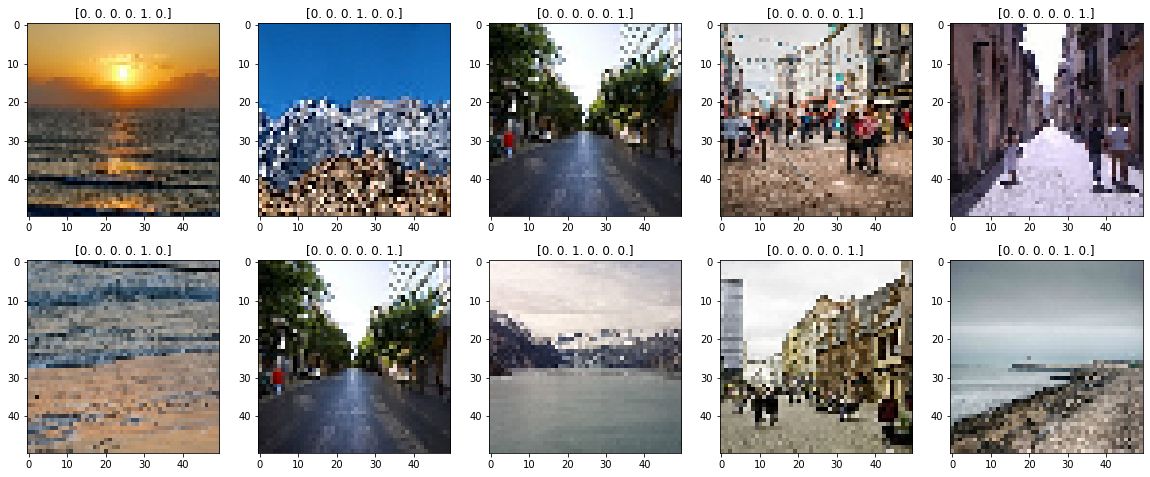

In [3]:
indices = [np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()    

In [4]:
values= list(train_dataset.class_indices.values())
keys= list(train_dataset.class_indices.keys())

dics=list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)
mappings

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [5]:
#developing a neural network. Adding each layer
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

          
model.add(Flatten())
kernel_regularizer = keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))
          
model.summary()          


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 50)        1

In [6]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics='accuracy')
history =model.fit(train_dataset,batch_size=80,epochs=5,validation_data=test_dataset)



Epoch 1/5
439/439 [==============================] - 378s 854ms/step - loss: 1.2267 - accuracy: 0.4991 - val_loss: 1.1437 - val_accuracy: 0.6285
Epoch 2/5
439/439 [==============================] - 94s 214ms/step - loss: 0.9283 - accuracy: 0.6355 - val_loss: 0.9008 - val_accuracy: 0.6678
Epoch 3/5
439/439 [==============================] - 80s 181ms/step - loss: 0.7936 - accuracy: 0.7057 - val_loss: 0.8555 - val_accuracy: 0.7125
Epoch 4/5
439/439 [==============================] - 78s 178ms/step - loss: 0.6922 - accuracy: 0.7587 - val_loss: 0.7158 - val_accuracy: 0.7669
Epoch 5/5
439/439 [==============================] - 80s 183ms/step - loss: 0.6322 - accuracy: 0.7774 - val_loss: 0.7286 - val_accuracy: 0.7457
